In [48]:
import os
import rasterio
import shapely
import numpy as np

from matplotlib import pyplot



In [56]:
# File Path

work_dir = "./data/"
image = os.path.join(work_dir, "LWIR_QuickMosaic_16-bit_9327.tiff")
# work_dir ="Data"
# MillsFire="C:/Users/centr/GeoHack23-WildfirePerimeter/Data/LWIR_QuickMosaic_16-bit_9327.tiff"
OutputFilePath ="./data/"

In [57]:
# Open the raster file using rasterio
with rasterio.open(image) as src:
    # Read the raster data and metadata
    raster_data = src.read(1)  # Read the first band of the raster
    raster_meta = src.meta

    # Classify the raster data
    classified_data = np.where(raster_data < 35000, 0, 1)

# Update the metadata with the new data type and nodata value
raster_meta.update(dtype=rasterio.uint8, nodata=None)

# Write the classified raster to a new file
with rasterio.open(OutputFilePath + 'RasterClass.tif', 'w', **raster_meta) as dst:
    dst.write(classified_data.astype(rasterio.int16), 1)


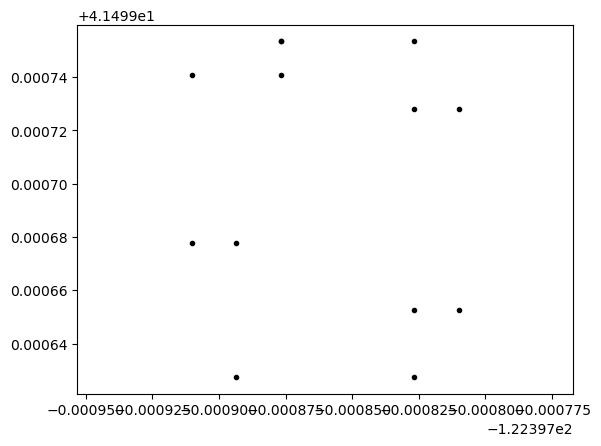

In [60]:
import rasterio
from rasterio import features
import fiona
import matplotlib.pyplot as plt

# Open the raster file using rasterio
with rasterio.open(image) as src:
    # Read the raster data and metadata
    raster_data = src.read(1)  # Read the first band of the raster
    raster_meta = src.meta

    # Classify the raster data
    classified_data = np.where(raster_data < 35000, 0, 1)

# Update the metadata with the new data type and nodata value
raster_meta.update(dtype=rasterio.int16, nodata=None)

# Write the classified raster to a new file
with rasterio.open(OutputFilePath + 'RasterClass.tif', 'w', **raster_meta) as dst:
    dst.write(classified_data, 1)

# Convert the classified raster to polygons
shapes = features.shapes(classified_data, transform=raster_meta['transform'])

# Write the polygons to a shapefile
with fiona.open(OutputFilePath + 'RasterClass.shp', 'w', 'ESRI Shapefile', schema={'geometry': 'Polygon', 'properties': {}}) as dst:
    for shape in shapes:
        value = shape[1]
        if value > 0:
            feature = {'geometry': shape[0], 'properties': {}}
            dst.write(feature)

# (Optional) Display the polygons using matplotlib
with fiona.open(OutputFilePath + 'RasterClass.shp', 'r') as src:
    for i, layer in enumerate(src):
        if i == 0:
            x, y = [], []
            for poly in layer['geometry']['coordinates']:
                x += [pt[0] for pt in poly]
                y += [pt[1] for pt in poly]
            plt.plot(x, y, 'k.')
            plt.axis('equal')
            plt.show()
